In [25]:
def histeq(im,nbr_bins=256):
    #get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() #cumulative distribution function
    cdf = 255 * cdf / cdf[-1] #normalize
    #use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

from scipy.misc import imsave, imread
import numpy as np
def histMatch(imsrc, imtint):
    nbr_bins = 255
    if len(imsrc.shape) < 3:
        # add dim
        imsrc = imsrc[:, :, np.newaxis]
        imtint = imtint[:, :, np.newaxis]
    imres = imsrc.copy()
    for d in range(imsrc.shape[2]):
        # calculate histogram of each image
        imhist, bins = np.histogram(imsrc[:, :, d].flatten(), nbr_bins, normed=True)
        tinthist, bins = np.histogram(imtint[:, :, d].flatten(), nbr_bins, normed=True)
        # cumulative distribution function of reference image
        cdfsrc = imhist.cumsum()
        cdfsrc = (255 * cdfsrc / cdfsrc[-1]).astype(np.uint8)  # normalize
        # cumulative distribution function of target image
        cdftint = tinthist.cumsum()
        cdftint = (255 * cdftint / cdftint[-1]).astype(np.uint8)  # normalize
        # use linear interpolation of cdf to find new pixel values
        im2 = np.interp(imsrc[:, :, d].flatten(), bins[:-1], cdfsrc)
        im3 = np.interp(im2, cdftint, bins[:-1])
        imres[:, :, d] = im3.reshape((imsrc.shape[0], imsrc.shape[1]))
    return imres

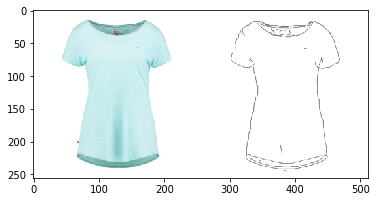

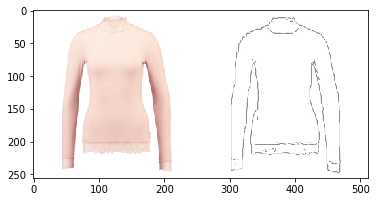

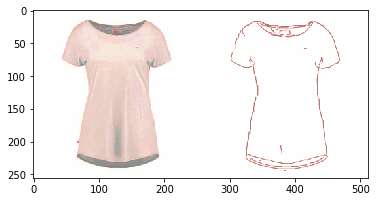

In [26]:
imsrc = imread("2.png")
imtint = imread("4.png")
imres1 = histMatch(imsrc,imtint)        
plt.imshow(imsrc)
plt.show()
plt.imshow(imtint)
plt.show()
plt.imshow(imres1)
plt.show()